**Problem Statement :** Prediction of mobile price based on their features. 

Mobile price depends on various factors such as resolution, brand, size, weight, imaging quality, RAM, battery and cpu power

* Product_id : ID of each cellphone.
* Price : Price of each cellphone.
* Sale : Sales number.
* weight : Weight of each cellphone.
* resoloution : Resoloution of each cellphone.
* ppi : Phone Pixel Density.
* cpu core : Type of CPU core in each cellphone.
* cpu freq : CPU Frequency in each cellphone.
* internal mem : Internal memory of each cellphone.
* ram : RAM of each cellphone.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Cellphone[1].csv")

## EDA

In [3]:
df.shape

(161, 14)

In [4]:
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [6]:
df.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


**Missing Values**

In [7]:
df.isna().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

### Summary of EDA

* The data contains 161 observations and 14 variables.
* All our variables are numerical.
* Our output will be "Price".
* The data does not contain missing values.

## Data Visualization

### Distribution Plot

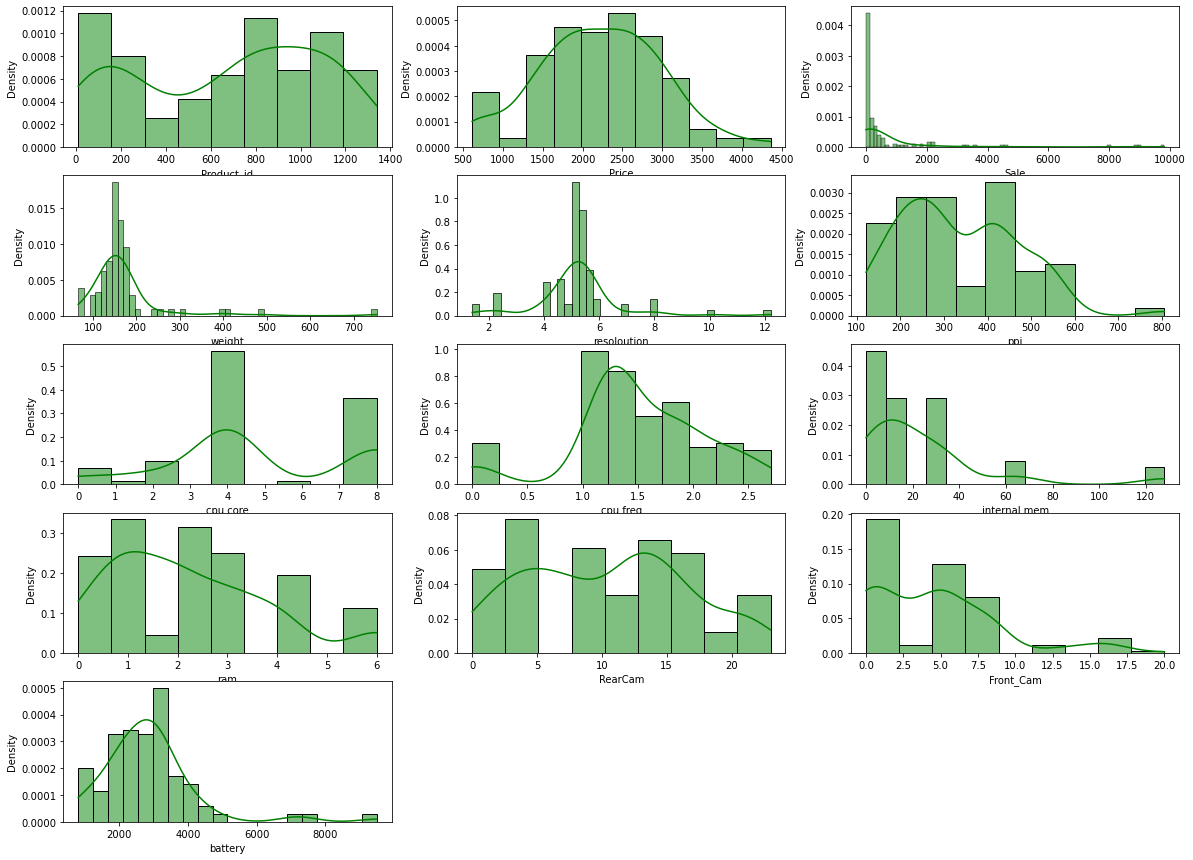

In [8]:
plt.figure(figsize=(20,15))
j = 1
for i in df.iloc[:,:-1].columns:
    plt.subplot(5,3,j)
    sns.histplot(df[i], stat = "density", kde = True , color = "green")
    j+=1


### Correlation Plot

**Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate).**


<AxesSubplot:>

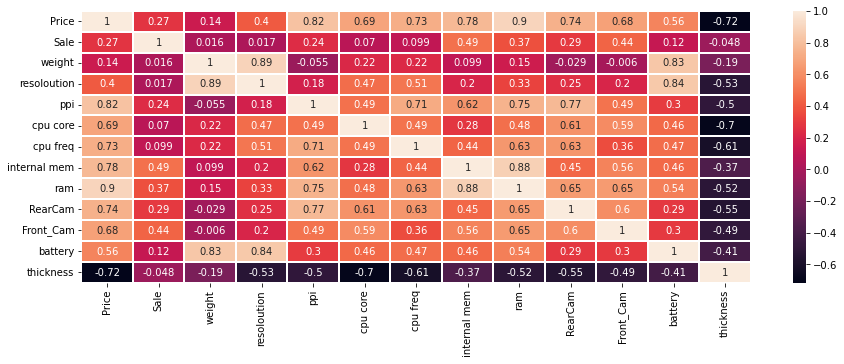

In [9]:
plt.subplots(figsize=(15, 5))
sns.heatmap(df.drop(["Product_id"], axis =1 ).corr(), linewidths=.1, annot=True)

In [10]:
x = df.drop(["Price","Product_id"], axis=1)
y = df["Price"]

In [11]:
pd.concat([x,y], axis=1).corr()["Price"].sort_values()

thickness      -0.716773
weight          0.144555
Sale            0.273263
resoloution     0.404010
battery         0.559946
Front_Cam       0.675286
cpu core        0.686811
cpu freq        0.727383
RearCam         0.739538
internal mem    0.776738
ppi             0.817614
ram             0.896915
Price           1.000000
Name: Price, dtype: float64

In [12]:
x["weight"] = np.sqrt(x["weight"])

In [13]:
x["Sale"] = np.sqrt(x["Sale"])

In [14]:
pd.concat([x,y], axis=1).corr()["Price"].sort_values()

thickness      -0.716773
weight          0.222260
Sale            0.253080
resoloution     0.404010
battery         0.559946
Front_Cam       0.675286
cpu core        0.686811
cpu freq        0.727383
RearCam         0.739538
internal mem    0.776738
ppi             0.817614
ram             0.896915
Price           1.000000
Name: Price, dtype: float64

In [15]:
numcols = x.select_dtypes(["int64","float64"]).columns
from scipy.stats import skew

Sale columns has skewness: 2.4905271514106757
weight columns has skewness: 2.6401359361240666
resoloution columns has skewness: 1.1651240899950517
ppi columns has skewness: 0.5968748381794743
cpu core columns has skewness: -0.008992327223418618
cpu freq columns has skewness: -0.5078743018040432
internal mem columns has skewness: 2.3673605920431373
ram columns has skewness: 0.7852934253781831
RearCam columns has skewness: 0.10593046867056001
Front_Cam columns has skewness: 1.1588229257558682
battery columns has skewness: 2.0731123376199942
thickness columns has skewness: 1.5728494102242152


<Figure size 360x144 with 0 Axes>

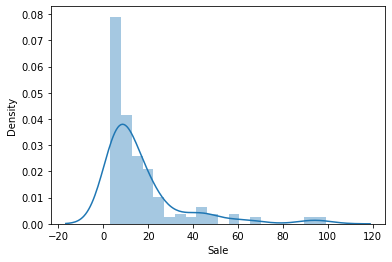

<Figure size 360x144 with 0 Axes>

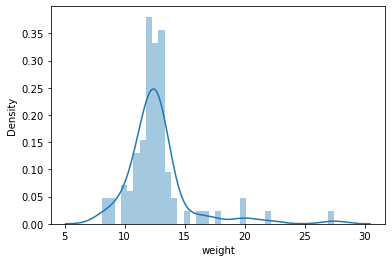

<Figure size 360x144 with 0 Axes>

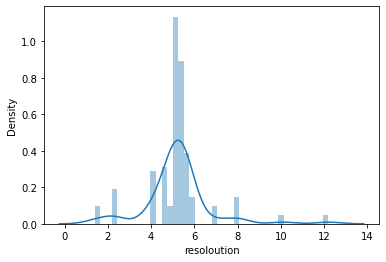

<Figure size 360x144 with 0 Axes>

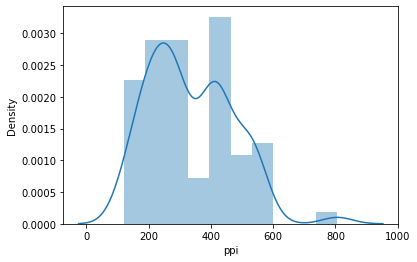

<Figure size 360x144 with 0 Axes>

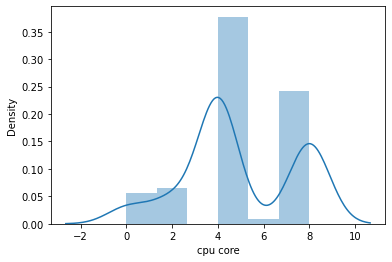

<Figure size 360x144 with 0 Axes>

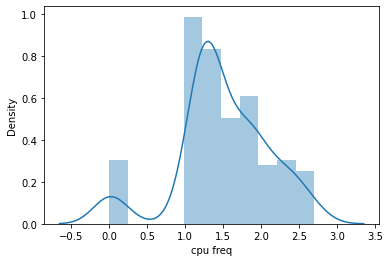

<Figure size 360x144 with 0 Axes>

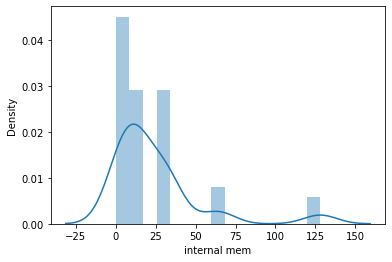

<Figure size 360x144 with 0 Axes>

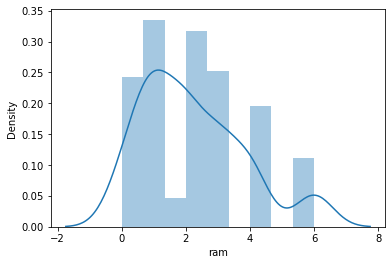

<Figure size 360x144 with 0 Axes>

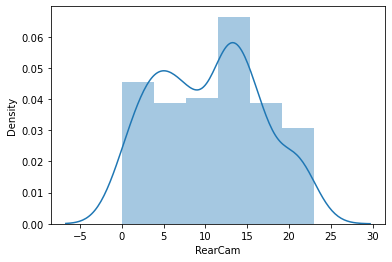

<Figure size 360x144 with 0 Axes>

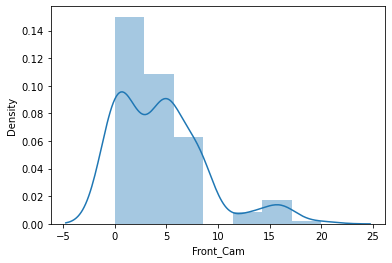

<Figure size 360x144 with 0 Axes>

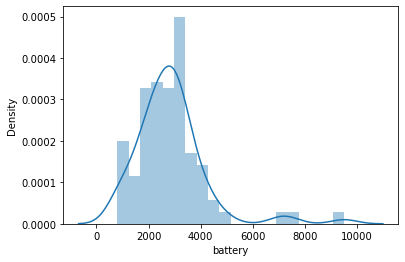

<Figure size 360x144 with 0 Axes>

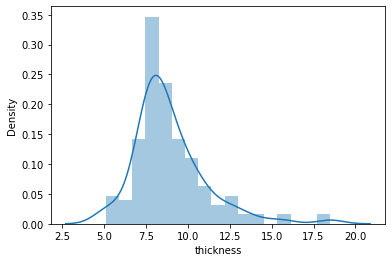

In [16]:
for i in x[numcols]:
   # print(i)
   # print(skew(x[i]),)
    
    print(f'{i} columns has skewness: {skew(x[i])}')
    
    
    plt.figure(figsize=(5,2))
    plt.figure()
    sns.distplot(x[i])

**Types of Correlation**
* Perfect Positive Correlation  1
* High Positive Correlation 0.9
* Low Positive Correlation 0.5
* No correlation 0
* Low Negative Correlation -0.5
* High Negative Correlation -0.9
* Perfect Negative Correlation -1

In [17]:
pd.concat([x,y], axis=1).corr()["Price"].sort_values()

thickness      -0.716773
weight          0.222260
Sale            0.253080
resoloution     0.404010
battery         0.559946
Front_Cam       0.675286
cpu core        0.686811
cpu freq        0.727383
RearCam         0.739538
internal mem    0.776738
ppi             0.817614
ram             0.896915
Price           1.000000
Name: Price, dtype: float64

## Model Building

In [18]:
x = df.drop(["Price","Product_id"], axis=1)
y = df["Price"]

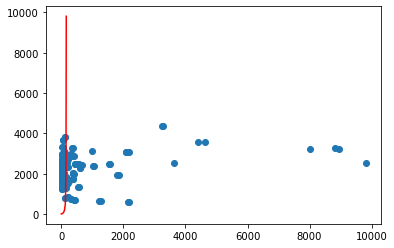

In [19]:
plt.scatter(x['Sale'],y)
#plt.scatter(xtrain['Salaries Reported'][:10], train_pred[:10],c = 'r' )
plt.plot(x["Sale"], color="r")
#plt.grid()


In [20]:
x

,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
156,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


In [21]:
y

0      2357
1      1749
2      1916
3      1315
4      1749
       ... 
156    3551
157    3211
158    3260
159    3211
160    2536
Name: Price, Length: 161, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3, random_state=1)

In [24]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)

# Evaluate the performance of the model using mean squared error
mae = mean_absolute_error(ytest,ypred)
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)
print("Mean absoluye error:",mae)
print("Mean squared error: ", mse)
print("R2 score: ", r2)


Mean absoluye error: 132.32993917475974
Mean squared error:  25118.685448075383
R2 score:  0.9493709061747827


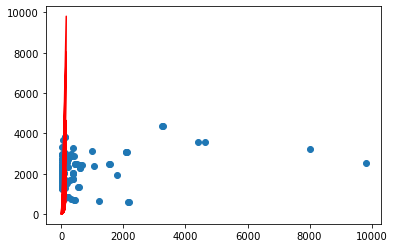

In [29]:
plt.scatter(xtrain['Sale'],ytrain)
#plt.scatter(xtrain['Salaries Reported'][:10], train_pred[:10],c = 'r' )
plt.plot(xtrain["Sale"], color="r")
#plt.grid()


In [34]:
mse = mean_squared_error(ytest,ypred)

In [35]:
rmse = np.sqrt(mse)

In [36]:
rmse

158.4887549578057

In [39]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=3)

tree_reg.fit(xtrain, ytrain)

# Predict the output for the test data
ypred = tree_reg.predict(xtest)

# Evaluate the performance of the model using mean squared error
mae = mean_absolute_error(ytest,ypred)
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)
print("Mean absoluye error:",mae)
print("Mean squared error: ", mse)
print("R2 score: ", r2)

Mean absoluye error: 238.129385478245
Mean squared error:  83762.81223692777
R2 score:  0.831168104374968


In [41]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(xtrain, ytrain)

# Predict the output for the test data
ypred = rf_reg.predict(xtest)

# Evaluate the performance of the model using mean squared error and R2 score
mae = mean_absolute_error(ytest,ypred)
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)
print("Mean absoluye error:",mae)
print("Mean squared error: ", mse)
print("R2 score: ", r2)

Mean absoluye error: 89.85734693877552
Mean squared error:  11579.693120408161
R2 score:  0.9766600298143672


### Got 97% accuracy by using RandomForest Regressor